In [1]:
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [15, 10]

In [47]:
def f(z):
    return z**3 - 1
def f_(z):
    # TODO: Implement the function
    return 3* z**2
roots = [
    # TODO: Add the roots of f
    0+0j,
    0+0j,
    0+0j,
]

def newton(initial, max_iterations=15, eps=1e-14):
    x = initial
    for i in range(max_iterations):
        if abs(f(x))< 1e-14:
            return x, i
        x -= f(x)/(f_(x)+eps)
    return x, 15

def visualize_roots(f, f_, resolution=500, max_iterations=15, x_range=(-2, 2), y_range=(-2, 2)):
    # TODO: Calculate the complex root of f the newton method converges to
    # when starting at point x for all points x in  x_range, y_range.
    # Choose a different rgb-color for different roots, e.g., (x,0,0), (0, x, 0) and (0, 0, x)
    # and calculate the color intensity x from the number of iterations needed to converge against that root.
    # Return the result as an array with the shape (resolution, resolution, 3).
    A = np.zeros((resolution, resolution, 3))
    for i, re in enumerate(np.linspace(*x_range, resolution)):
        for j, im in enumerate(np.linspace(*y_range, resolution)):
            root, it = newton(complex(re,im))
            if root.imag > 0.1:
                A[i,j,0] =  it/15
            else:
                if root.imag < -0.1:
                    A[i,j,1] =  it/15
                else:
                    A[i,j,2] =  it/15
    # Int Werte zwischen 0 und 255 sinnvoll für jeden Eintrag
    return A

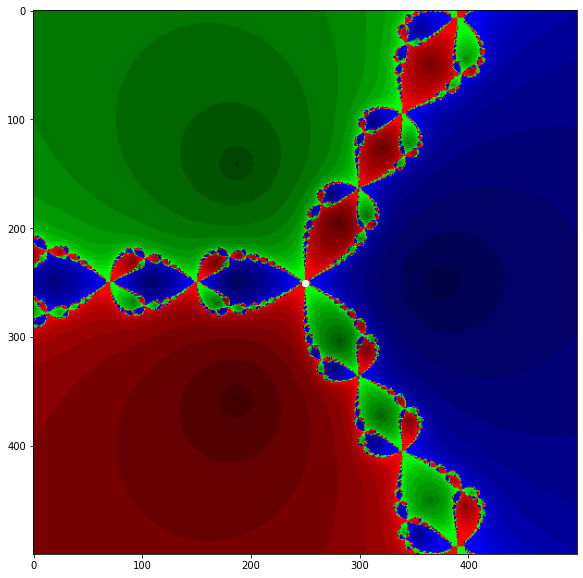

In [48]:
resolution = 500
max_iterations = 15
x_range = -2, 2
y_range = -2, 2

A = visualize_roots(f, f_, resolution, max_iterations, x_range, y_range)
plt.imshow(A)

points = [[resolution/2 + root.real*resolution/2/2, resolution/2 + root.imag*resolution/2/2] for root in roots]
plt.plot([p[0] for p in points], [p[1] for p in points], "wo")
plt.show()